In [2]:
import io
import requests
import numerapi

In [3]:
napi = numerapi.NumerAPI(verbosity='info')

---
### 投資可能ユニバース

https://numerai-quant-public-data.s3-us-west-2.amazonaws.com/example_predictions/latest.csv

In [35]:
res = requests.get("https://numerai-quant-public-data.s3-us-west-2.amazonaws.com/example_predictions/latest.csv")

In [36]:
df = pd.read_csv(io.StringIO(res.content.decode('utf-8')), header=0, index_col=0)

In [37]:
df.head(3)

,prediction
ticker,
1999 HK,0.548814
1972 HK,0.715189
1299 HK,0.602763


In [38]:
# stock_idとregionのdataframe
universe = pd.DataFrame([val.split(" ") for val in df.index.values], columns=["stock_id", "region"])
universe.fillna("blank", inplace=True)
universe.head(3)

,stock_id,region
0,1999,HK
1,1972,HK
2,1299,HK


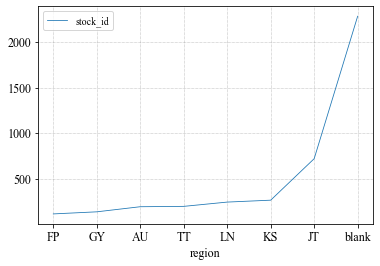

In [39]:
# 上位region
universe.groupby("region").count().sort_values(by="stock_id").tail(8).plot()

blank: US->blank  
JT: JP-> .T  
KS: KR-> .KS  
LN: UK-> .L  
TT: ??  
AU: AUD-> .AX  
GY: Deutche-> .DE  
FP: France-> .PA

MM: Mexico  
BS: Brasil-> .SA   
.: Toronto-> .TO  
TI: Istanbur-> .IS  
SW: Swiss-> .SW

---
YahooFinance用の個別株Ticker作成

In [40]:
main_universe_region = universe.groupby("region").count().sort_values(by="stock_id").tail(8).index.values

In [43]:
# 上位regionのみ抜き出し, regionコードをYahooのものに置換
main_universe_region\
= universe.groupby("region").count().sort_values(by="stock_id").tail(8).index.values
main_universe = universe\
.query("region in @main_universe_region")\
.replace({
    "blank" : "",
    "JT" : ".T",
    "KS" : ".KS",
    "LN" : ".L",
    "AU" : ".AX",
    "GY" : ".DE",
    "FP" : ".PA"
})
# USのidの末尾の.を消す
main_universe.stock_id = main_universe.stock_id.apply(lambda x: x.replace(".", ""))

In [45]:
main_universe.sum(axis=1).values

array(['060980.KS', '108320.KS', '128940.KS', ..., 'GEI', 'EQB', 'WSP'],
      dtype=object)

In [ ]:
main_universe

In [46]:
main_universe.stock_id = main_universe.stock_id.apply(lambda x: x.replace(".", ""))

In [55]:
res = requests.get(
    "https://numerai-quant-public-data.s3-us-west-2.amazonaws.com/example_predictions/latest.csv"
)
df = pd.read_csv(io.StringIO(res.content.decode('utf-8')), header=0, index_col=0)

# reform
universe =\
    pd.DataFrame([val.split(" ") for val in df.index.values], columns=["stock_id", "region"]).fillna("blank")

# extract & replace
main_universe_regions =\
    ["JT", "KS", "LN", "AU", "GY", "FP", "blank"]

main_universe =\
    universe\
    .query("region in @main_universe_regions")\
    .replace({
        "blank": "",
        "JT": ".T",
        "KS": ".KS",
        "LN": ".L",
        "AU": ".AX",
        "GY": ".DE",
        "FP": ".PA"
    })
# USのidの末尾の.を消しておく
main_universe.stock_id = main_universe.stock_id.apply(lambda x: x.replace(".", ""))

# 結合することでYahooFinanceIDに直す
main_stock_ids = main_universe.sum(axis=1).reset_index(drop=True).values.tolist()

---
Enum

In [31]:
from enum import Enum


class Country(Enum):
    US = "US"
    JP = "JP"
    UK = "UK"
    KS = "KS"
    DE = "DE"
    FR = "FR"
    AU = "AU"
            
    def toNumerai(self):
        if self == Country.US: return ""
        if self == Country.JP: return "JT"
        if self == Country.UK: return "LN"
        if self == Country.KS: return "KS"
        if self == Country.FR: return "FP"
        if self == Country.AU: return "AS"
        if self == Country.DE: return "GY"
    
    def toYahoo(self):
        if self == Country.US: return ""
        if self == Country.JP: return ".T"
        if self == Country.UK: return ".L"
        if self == Country.KS: return ".KS"
        if self == Country.FR: return ".PA"
        if self == Country.AU: return ".AX"
        if self == Country.DE: return ".DE"
    
    @staticmethod
    def getCountryCode(country_code):
        if country_code == "": return Country.US
        elif country_code == "JT" or country_code == ".T": return Country.JP
        elif country_code == "LN" or country_code == ".L": return Country.UK
        elif country_code == "KS" or country_code == ".KS": return Country.KS
        elif country_code == "FP" or country_code == ".PA": return Country.FR
        elif country_code == "AS" or country_code == ".AX": return Country.AU
        elif country_code == "GY" or country_code == ".DE": return Country.DE
    

In [28]:
Country.DE.toYahoo()

'.DE'

In [34]:
import json

In [ ]:
json.dump(, file, indent=4)